# 多项式回归

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)


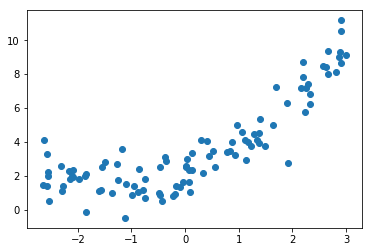

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

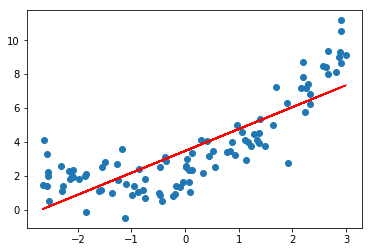

In [5]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [6]:
X2 = np.hstack([X, X**2])

In [7]:
X2.shape

(100, 2)

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

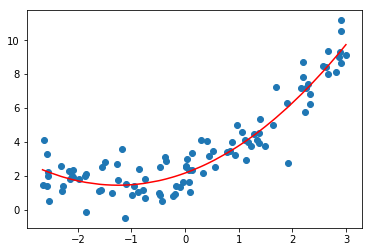

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([1.15100374, 0.46058289])

In [11]:
lin_reg2.intercept_

2.1556034763183987

# sklearn

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [14]:
X2.shape

(100, 3)

In [15]:
X[:5,:]

array([[ 2.90443488],
       [ 2.20216244],
       [-1.85395373],
       [-0.49330876],
       [-2.5770716 ]])

In [16]:
X2[:5,:]

array([[ 1.        ,  2.90443488,  8.43574196],
       [ 1.        ,  2.20216244,  4.84951942],
       [ 1.        , -1.85395373,  3.43714444],
       [ 1.        , -0.49330876,  0.24335353],
       [ 1.        , -2.5770716 ,  6.64129802]])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X2, y)
y_predict3 = lin_reg3.predict(X2)

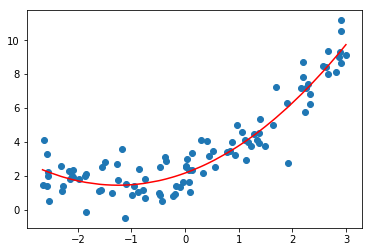

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='r')
plt.show()

In [20]:
lin_reg3.coef_

array([0.        , 1.15100374, 0.46058289])

In [21]:
lin_reg3.intercept_

2.155603476318399

In [22]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [24]:
X2.shape

(5, 6)

In [25]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

# pipline

In [26]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [29]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [30]:
y_predict = poly_reg.predict(X)

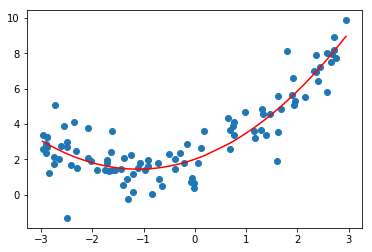

In [31]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [34]:
def PolynomialRgression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])


In [36]:
poly_reg2 = PolynomialRgression(degree=2)
poly_reg2.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [37]:
y2_predict = poly_reg2.predict(X)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y, y2_predict)

0.9865461846512098

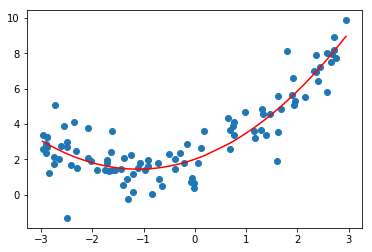

In [40]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

# 改变degree的值

In [41]:
poly10_reg = PolynomialRgression(degree=10)
poly10_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [42]:
y10_predict = poly10_reg.predict(X)

In [43]:
mean_squared_error(y, y10_predict)

0.9301435339651563

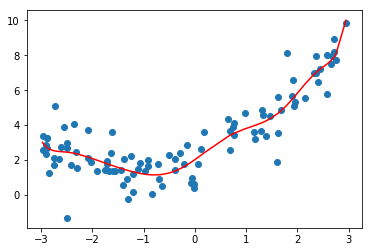

In [44]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [45]:
poly100_reg = PolynomialRgression(degree=100)
poly100_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [46]:
y100_predict = poly100_reg.predict(X)

In [47]:
mean_squared_error(y,y100_predict)

0.3912085330896638

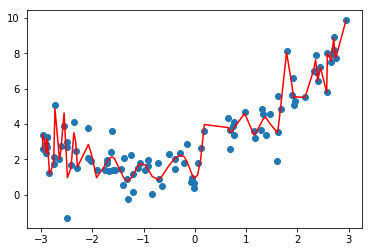

In [48]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [52]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)

In [50]:
y_plot = poly100_reg.predict(X_plot)

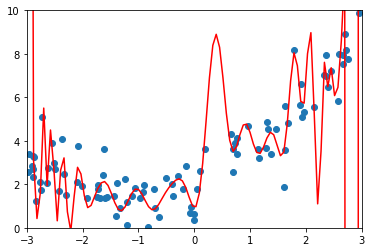

In [57]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### 以上就产生过拟合， 使用线性回归实际上是欠拟合

# 模型泛化能力

- 对于新的样本，预测能力越好的模型，他的泛化能越强

### 训练集合测试集

In [58]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [62]:
lin_reg = LinearRegression()

In [63]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_predict = lin_reg.predict(X_test)

In [65]:
mean_squared_error(y_test, y_predict)

2.9768302966140485

In [66]:
poly_reg2 = PolynomialRgression(degree=2)
poly_reg2.fit(X_train, y_train)
y2_predict = poly_reg2.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.3665650052648701

In [67]:
poly10_reg = PolynomialRgression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

1.4854096484326151

In [68]:
poly100_reg = PolynomialRgression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

5842574.562873088

- 阶数越高，模型越复杂·

- 欠拟合：算法所训练的模型不能完整表述数据关系 
- 过拟合：算法所训练的模型过多的表达了数据间的噪音关系




# 学习曲线

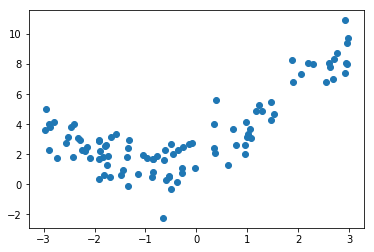

In [70]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)
plt.scatter(X,y)
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [72]:
X_train.shape

(75, 1)

In [73]:
train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

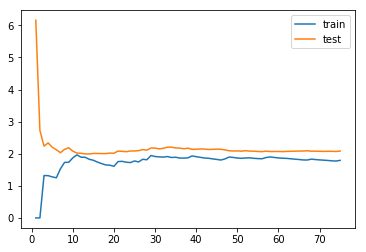

In [74]:
plt.plot([i for i in range(1, 76)],np.sqrt(train_score), label = 'train')
plt.plot([i for i in range(1, 76)],np.sqrt(test_score), label = 'test')
plt.legend()
plt.show()

In [79]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(train_score), label = 'train')
    plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(test_score), label = 'test')
    plt.legend()
#     plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

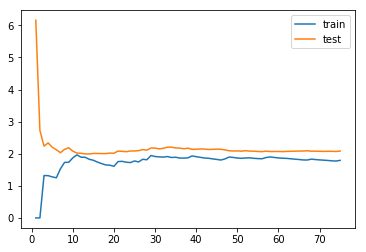

In [80]:
plot_learning_curve(LinearRegression(),X_train, X_test, y_train, y_test)

In [81]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(train_score), label = 'train')
    plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(test_score), label = 'test')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

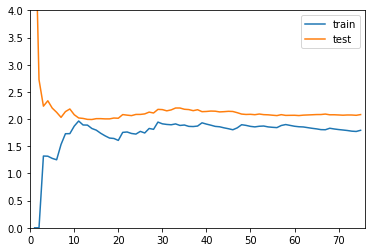

In [82]:
plot_learning_curve(LinearRegression(),X_train, X_test, y_train, y_test)

In [83]:
def PolynomialRgression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

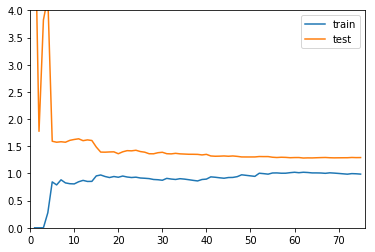

In [85]:
poly2_reg = PolynomialRgression(degree=2)
plot_learning_curve(poly2_reg,X_train, X_test, y_train, y_test)

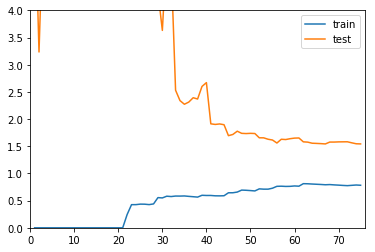

In [86]:
poly20_reg = PolynomialRgression(degree=20)
plot_learning_curve(poly20_reg,X_train, X_test, y_train, y_test)

# 上面就是过拟合了：)